In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
df=pd.read_csv('bestsellers with categories.csv')

In [27]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [28]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [29]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [30]:
df['Price'].value_counts()

8      52
6      38
9      38
5      36
11     35
4      32
14     30
13     29
10     28
12     27
7      23
15     21
16     20
17     19
20     17
18     14
0      12
46     10
21      9
28      6
22      6
40      5
23      5
24      5
2       5
30      5
19      4
27      4
25      2
32      2
105     2
82      1
36      1
39      1
42      1
52      1
53      1
3       1
54      1
1       1
Name: Price, dtype: int64

In [31]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


<AxesSubplot:>

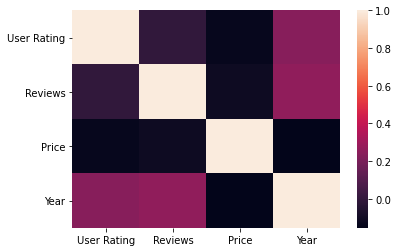

In [32]:
sns.heatmap(df.corr())

In [33]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

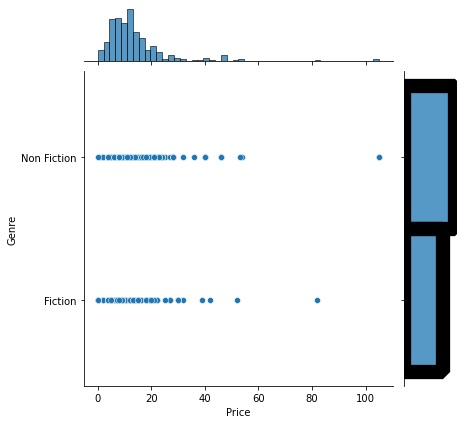

In [34]:
sns.jointplot(x='Price',y='Genre',data=df)# 20 dollar has maximum  

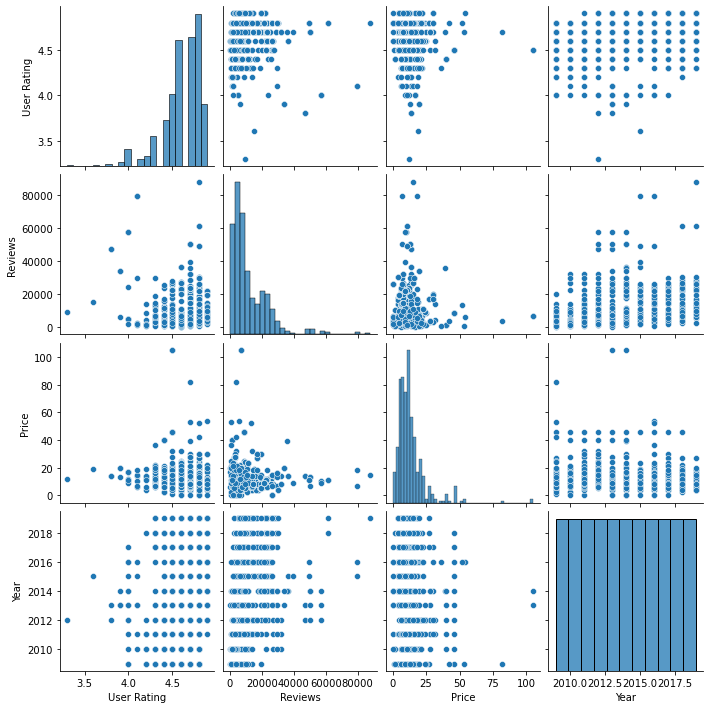

In [35]:
sns.pairplot(data=df)

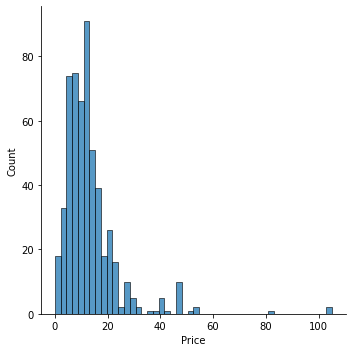

In [36]:
sns.displot(df['Price'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Genre', ylabel='count'>

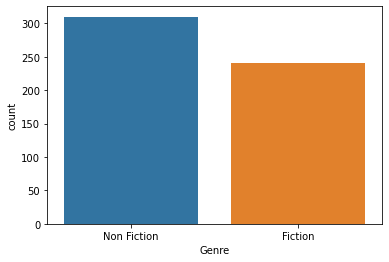

In [37]:
sns.countplot('Genre',data=df)

<AxesSubplot:xlabel='Genre'>

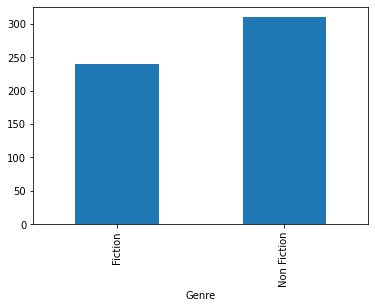

In [63]:
df.groupby('Genre')['Genre'].count().plot.bar()

<AxesSubplot:ylabel='Price'>

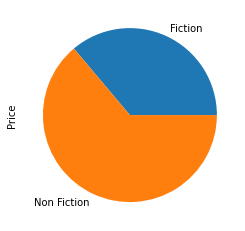

In [41]:
df.groupby('Genre')['Price'].sum().plot.pie()

<AxesSubplot:xlabel='User Rating'>

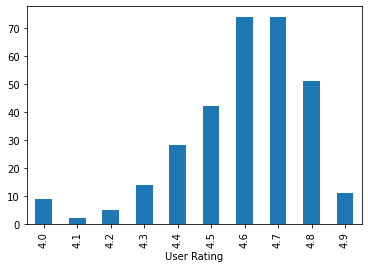

In [42]:
df_nonfiction = df[df['Genre']=='Non Fiction']
df_nonfiction.groupby('User Rating')['Author'].count().plot.bar()

<AxesSubplot:xlabel='User Rating'>

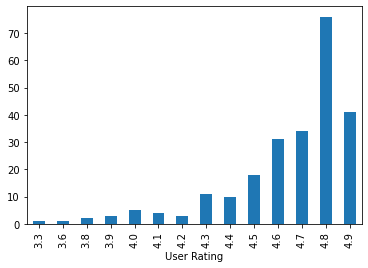

In [43]:
df_fiction = df[df['Genre']=='Fiction']
df_fiction.groupby('User Rating')['Author'].count().plot.bar()

<AxesSubplot:ylabel='Author'>

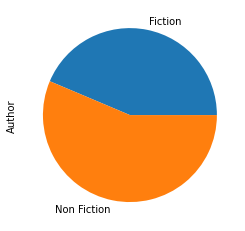

In [44]:
df.groupby(['Genre'])['Author'].count().plot.pie()

In [46]:
top_5_author = ( 
    df.groupby('Author', as_index=False)
    .agg({'Price':'sum'})
    .sort_values('Price', ascending=False)
    .rename(columns={'Price': 'sum_price'})[:5]
)

In [47]:
top_5_author


,Author,sum_price
11,American Psychological Association,460
230,The College Board,236
10,American Psychiatric Association,210
92,Gary Chapman,189
90,Gallup,153


In [52]:
top_5_user_rating = (
    df.groupby('Author', as_index=False)
    .agg({'User Rating':'sum'})
    .sort_values('User Rating', ascending=False)[:5]
)

In [53]:
top_5_user_rating


,Author,User Rating
120,Jeff Kinney,57.6
197,Rick Riordan,52.5
92,Gary Chapman,52.1
226,Suzanne Collins,51.3
11,American Psychological Association,45.0


In [54]:
df.query('Author == "Gary Chapman"').value_counts('Name')

Name
The 5 Love Languages: The Secret to Love that Lasts                          5
The 5 Love Languages: The Secret to Love That Lasts                          5
The Five Love Languages: How to Express Heartfelt Commitment to Your Mate    1
dtype: int64

In [55]:
df.Genre.value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [56]:
whats_best_cost_genre= (
    df.groupby('Genre', as_index=False)
    .agg({'Price':'sum'})
    .sort_values('Price', ascending=False)
    .rename(columns={'Price':'sum_price_genre'})
)

In [57]:
whats_best_cost_genre

,Genre,sum_price_genre
1,Non Fiction,4601
0,Fiction,2604


In [60]:
minimum_rating = (
    df.groupby(['Author','Name', 'Price'], as_index=False)
    .agg({'User Rating':'sum'})
    .sort_values('User Rating', ascending=True).rename(columns={'User Rating':'user_rating_min'})[:5]
)
minimum_rating

,Author,Name,Price,user_rating_min
154,J.K. Rowling,The Casual Vacancy,12,3.3
135,Harper Lee,Go Set a Watchman: A Novel,19,3.6
350,Veronica Roth,Allegiant,13,3.9
128,Gillian Flynn,Gone Girl,9,4.0
240,Muriel Barbery,The Elegance of the Hedgehog,11,4.0


In [62]:
max_price = (
    df.groupby(['Author', 'Name', 'Genre', 'User Rating'], as_index=False)
    .agg({'Price':'max'}).sort_values('Price', ascending=False)[:5]
)
max_price

,Author,Name,Genre,User Rating,Price
10,American Psychiatric Association,Diagnostic and Statistical Manual of Mental Di...,Non Fiction,4.5,105
311,Stephenie Meyer,The Twilight Saga Collection,Fiction,4.7,82
204,Lin-Manuel Miranda,Hamilton: The Revolution,Non Fiction,4.9,54
33,Bill Simmons,The Book of Basketball: The NBA According to T...,Non Fiction,4.7,53
145,J. K. Rowling,Harry Potter Paperback Box Set (Books 1-7),Fiction,4.8,52
